## I. Introduction 

This notebook details a simple application of Bayesian inference to applied to a real-world problem that was of interest to me. Bayesian statistics differs from classical statistics in that it takes into account prior knowledge of the data. This prior knowledge could be objective, say results from a similar study that was performed previously, or subjective, like intuition from experts in that field. The README page describes the ARRIVE study and my motivation to re-analyze the data using Bayesian inference. 

There were many books on Bayesian Statisitcs (freely available) that I refered to for guidance. The book [Probabilistic Programming & Bayesian Methods for Hackers](https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) by Cam Davidson was particularly useful because it makes Bayesian statistics so accessible to those without a deep mathematical background. And it's an entertaiing read.


## II. Objectives and hypotheses

The objective of this project are to:
  1. Apply Bayesian methods to determine whether elective induction reduces the occurance C-section and
  2. Compare my (Bayesian) findings to those of the ARRIVE trial, which used classical statisical methods

The hypotheses I am testing are:
 - H<sub>0</sub>: P(μ<sub>Ind</sub> = μ<sub>Mgmt</sub>), there is no difference in C-section incidient between induction and managment protocols.
 - H<sub>1</sub>: P(μ<sub>Ind</sub> > μ<sub>Mgmt</sub>), induction increases the incident of C-section.
 - H<sub>2</sub>: P(μ<sub>Ind</sub> < μ<sub>Mgmt</sub>),  induction reduces the incident of C-section.


## III. Evaluating the data

The ARRIVE trial had a total of 6,096 participants. Participants were first-time mothers with a low-risk of any medical complications. The participants were randomly assigned to receive labor induction at 39 weeks of gestation, i.e. Induction, or allow for labor to occur naturally (referred to as Expectant-Management in the study or here as Management). For this project, I am interested in the study's results for cesearan section rates between the two groups. Here was the reported data for the number of participants that under went C-section in each group:

![table_1](https://github.com/katannyak/Bayesian_Analysis_C-section_Rates/blob/master/img/table1_data.png)

<img align="center" width="600" src="https://github.com/katannyak/Bayesian_Analysis_C-section_Rates/blob/master/img/table1_data.png">

What kind of distribution does this data follow? The data for our two groups follows a binomial distribution which models the number of successes in *n* trials.

In our case, **k~ Binomial(n, p)** where:<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;k is the number of participants that underwent C-section ("successes"),<br/> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n is the total number of total particpants (trials),<br/> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;p is the probability of having a C-section where 0 ≤ p ≤ 1. 

Having defined our distribution of the data, we can then write out the likelihood function. For example, the likelihood function for the Induction group given n=3059 and k=132 is:

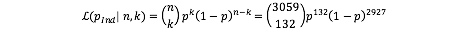

The table below shows the distrubution and likelihood functions for the Induction and Management groups:

<img align="center" width="600" src="https://github.com/katannyak/Bayesian_Analysis_C-section_Rates/blob/master/img/table2_likelihood.png">

In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats

## IV. Defining the prior distribution

Here is where the Bayesian influence comes in: interpreting the data in light of our previous knownledge in the form of a prior distrubtion. Ideally, we want to establish our prior distribution before we look at the data because we do not want our data to influence how we choose our prior distrubtion. Instead, we want our prior distribution to influence how we interpret our data.

Our parameters of interest, P<sub>Ind</sub> and P<sub>Mgmt</sub>, are the probabilities of Bernoulli "successes" in _n_ trials for each group and we will consider them drawn from a beta distribution. 

_**Why a beta distribution?**_   
A random variable _X ∼ Gamma(α,β)_ is restricted to [0,1], which fits our condition for P<sub>Ind</sub> and P<sub>Mgmt</sub>. Furthermore, a Beta prior with Binomial observations results in a Beta posterior. That is, Beta and Bionomial distributions are [conjugate pairs](https://en.wikipedia.org/wiki/Beta-binomial_distribution), making the posterior distribution of P<sub>Ind</sub> and P<sub>Mgmt</sub> mathematically much easier to find.

_**What information was used to inform our prior distribution?**_   
I used to prior knowledge on United States C-section rates only from low-risk nulliparas cases (i.e. first time mothers with low-risk of having a C-section), which is reflective of the participants of this study:

<img align="center" width="600" src="table3_rates.png">

This same information was used by the ARRIVE study to estimate the number of participants needed to obtain a specific statistical power. There are clearly differences in C-section rate for deliveries occuring during Week 39, 40, and 41 of gestation (Table 3). Furthermore, there is variation between time periods. To err on the side of objectivity, I will use the weekly average of C-section rate from all US nataility to 2003: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mean (μ) P<sub>Ind</sub> = 0.2497  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mean (μ) P<sub>Mgmt</sub> = 0.2497    

In determining the prior distribution, I also considered that C-section rates roughly range from 8% - 65% in the US; however this range likely overestimates the C-section rate because it includes high- and low-risk mothers whereas the ARRIVE trial considers only low-risk mothers.

In summary, we will find a beta distribution with mean 0.2497 and range 0.8-0.65.

_**Finding our alpha and beta parameters of the beta distribution?**_
The average, or expected value E, of a Beta distribution is E[p]=α/(α+β). Below, we tried different combinations of alpha and beta values that gave an expected value of 0.2497, and found that **Beta(4.3,11)** is a good distribution with mean 0.2497 and range 0.8-0.65.

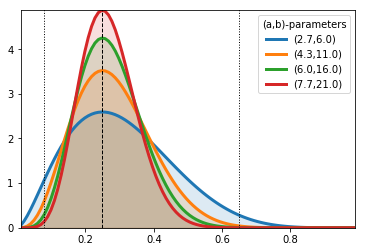

In [2]:
# Estimating alpha and beta paramters for p~Beta(alpha, beta)

mu = 0.2497
params = []

# Determine different sets of alpha, beta values 
beta_list = [5, 10, 15, 20]  # try these beta values
for i in range(len(beta_list)):
    alpha_ = (mu * beta_list[i]) / (1 - mu)
    params.append((alpha_ + 1, beta_list[i]+1))

# Plot the beta distributions
x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label="(%.1f,%.1f)" % (a, b), lw=3)
    plt.fill_between(x, 0, y, alpha=0.15, color=lines[0].get_color())
    plt.autoscale(tight=True)

figsize(15, 5)
plt.ylim(0)
plt.plot([0.08, 0.08], [0, 5], 'k-', lw=1, linestyle = 'dotted')
plt.plot([0.2497, 0.2497], [0, 5], 'k-', lw=1,linestyle = 'dashed')
plt.plot([0.65, 0.65], [0, 5], 'k-', lw=1,linestyle = 'dotted')
plt.legend(loc='upper right', title="(a,b)-parameters");

## IV. Determining the posterior distribution

By definition, the posterior distribution for P<sub>Ind</sub> for C-section incidients is:

<img align="center" width="600" src="posterior1.png">

Recall, that Binomial-Beta conjugate pairs result in a Beta distribution. Then by inspection, we see that π(P<sub>Ind</sub>)~ Beta(573.3,2500). 

Similiary for P<sub>Mgmt</sub> for C-section incidients, the posterior distrubiton is:

<img align="center" width="600" src="posterior2.png">

By inspection, we see that π(P<sub>Mgmt</sub>)~ Beta(671.7,2374).

Let's visualize the prior and posterior distrubutions:

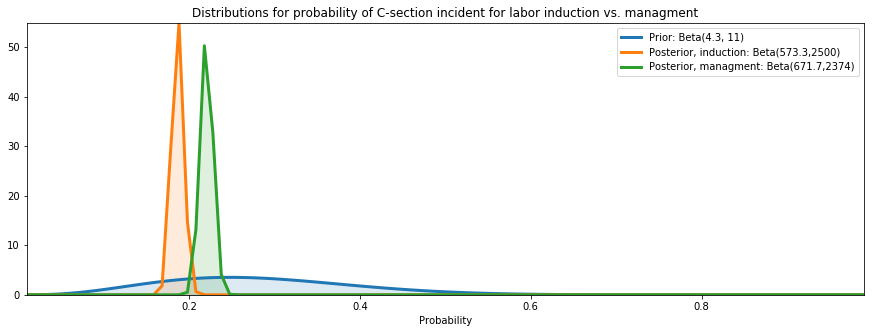

In [3]:
params = [(4.3, 11), (573.3,2500), (671.7,2374)]
legend_label = ["Prior: Beta(4.3, 11)", "Posterior, induction: Beta(573.3,2500)", "Posterior, managment: Beta(671.7,2374)"]
i=0

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label=legend_label[i], lw=3)
    plt.fill_between(x, 0, y, alpha=0.15, color=lines[0].get_color())
    plt.autoscale(tight=True)
    i += 1
plt.ylim(0)
plt.legend(loc='upper right')
plt.xlabel("Probability")
plt.title('Distributions for probability of C-section incident for labor induction vs. managment');

From our poterior distributions, we can now calculate the mean (expected value) C-section rate and the 95% equal-tailed credible set for the the Induction versus Mangament group. Recall that the expected value for a random variable of a beta distribution is E[p]=α/(α+β). 

In [4]:
# C-section: finding the means
mean_ind = 573.3/ (573.3+2500)
print("Mean probability of C-section with induction:", mean_ind)
mean_mngt = 671.7/ (671.7+2374)
print("Mean probability of C-section with managment:", mean_mngt)

Mean probability of C-section with induction: 0.18654215338561153
Mean probability of C-section with managment: 0.22054043405456877


In [5]:
ind_95cred = beta.ppf([0.025, 0.5, 0.975], 573.3,2500)
mngt_95cred = beta.ppf([0.025, 0.5, 0.975], 671.7,2374)

print("The median and 95% equi-tailed credible set")
print("Induction:", ind_95cred[1], "[",ind_95cred[0], ",", ind_95cred[2], "]")
print("Managment:", mngt_95cred[1],  "[",mngt_95cred[0], ",", mngt_95cred[2], "]")

The median and 95% equi-tailed credible set
Induction: 0.18647415200534004 [ 0.17296740717917342 , 0.2005032987744947 ]
Managment: 0.22047925788934594 [ 0.20599378174885252 , 0.23543470386469068 ]


##  V. Conclusions 

_**What did our results show?**_
We see that the average C-setion rates between the Induction (18.65%) and Mangament (22.05%) are similar. But when we compare the 95% equi-tailed credible sets, we find that the credible sets do not overlap meaning that the means are different. This supports our hypothesis (H<sub>2</sub>) that induction reduces the probability of C-section incidents.

_**How did our (Bayesian) findings compare to those of a classical approach?**_
The findings from the ARRIVE trial, which took a classical statitical approach also reported that 

"the percentage of women who underwent cesarean delivery was significantly lower in the induction group than in the expectant-management group (18.6% vs. 22.2%; relative risk, 0.84; 95% CI, 0.76 to 0.93; P<0.001)." 

Their reported mean percentage of women undergoing C-section in the Induction vs. Management groups (18.6% vs. 22.2%) is very close to our findings (18.654% vs. 22.054%), and therefore we've arrived at the same conclusions. In this analysis, our prior distribution was not very informative, meaning that the prior distrubution had very little influence on our posterior distribution. For a future analysis, I would like to establish our prior distrubution using raw data and to the average of that data.

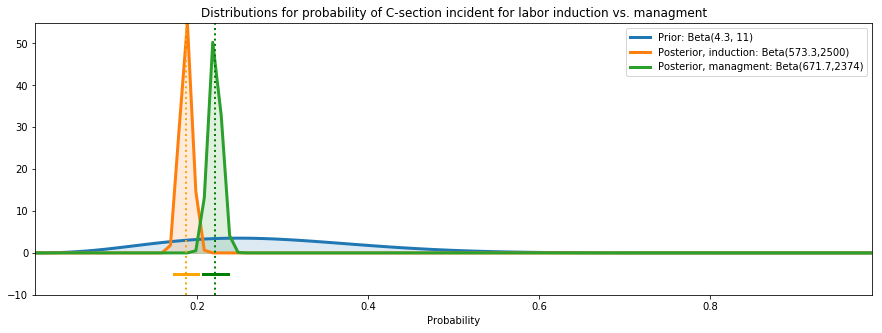

In [6]:
# Display the distrubutions with means and credible sets demarcated
params = [(4.3, 11), (573.3,2500), (671.7,2374)]
legend_label = ["Prior: Beta(4.3, 11)", "Posterior, induction: Beta(573.3,2500)", "Posterior, managment: Beta(671.7,2374)"]
i=0

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label=legend_label[i], lw=3)
    plt.fill_between(x, 0, y, alpha=0.15, color=lines[0].get_color())
    plt.autoscale(tight=True)
    i += 1
plt.ylim(-10)
plt.legend(loc='upper right')
plt.xlabel("Probability")
plt.title('Distributions for probability of C-section incident for labor induction vs. managment')

# Draw lines for means
plt.plot([0.1865, 0.1865], [-10, 65], 'k-', lw=2, linestyle = 'dotted', color= 'orange') # Induction
plt.plot([0.2204, 0.2204], [-10, 65], 'k-', lw=2,linestyle = 'dotted',color= 'green')  # Management

# Draw lines for credible sets
plt.plot([0.17296740717917342, 0.2005032987744947], [-5, -5], 'k-', lw=3, color= 'orange')
plt.plot([0.20599378174885252 , 0.23543470386469068], [-5, -5], 'k-', lw=3,color= 'green')